In [55]:
import pandas as pd 

class SetUp: 

    def __init__(self, file, types):
        self.df = self.load_csv(file, types)

    def load_csv(self, file, types):
        self.df = pd.read_csv(file, parse_dates = True, dtype = types)
        return self.df

In [56]:
from DistanceCalc import *
import numpy as np
import matplotlib.pyplot as plt


In [57]:
class KNN:

    def __init__(self, data):
        self. df = data
        self.correct = 0
        self.bool = False
        self.print_res = False
        self.feature_train = []
        self.feature_test = []
        self.target_train = []
        self.target_test = []


    def accuracy(self, split, k, formula):
        
        self.split_data(split)
        train_set = self.feature_train
        test_set = self.feature_test 
        
        if self.print_res:
            print("-------------------------------------")
        
        #loops over each wine instance in the test set
        for count, instance in enumerate(train_set):                                   
            #each wine passes through the classifier and returns the prediction
            predict = self.classifier(train_set, instance, k, self.target_train, formula)        
            actual = self.target_train[count]
            train = self.counter(actual, predict)
            
            if self.print_res:
                print("Sample class = " +actual+ ", prediction class = " +predict+ ", prediction correct:" + str(self.bool))
        
        self.correct = 0            
        #same loop as before but for test data
        for count, instance in enumerate(test_set):                             
            predict2 = self.classifier(train_set, instance, k, self.target_train, formula)
            actual2 = self.target_test[count]
            test = self.counter(actual2, predict2)
        
        self.correct = 0 
        #returns the accuracy for each set
        return ((train)/(len(self.feature_train))), ((test)/(len(test_set)))            


    def classifier(self, feat_train, instance, n, target_set, formula):        
        #retirves the most frequent target label in the list
        neighbours = self.kNN(feat_train, instance, n, target_set, formula)              
        pred = max(set(neighbours), key = neighbours.count)
        return pred

    
    def kNN(self, feat_train, instance, n, target_set, formula): 
        #kNN function takes individual wine samples and gets the k nearest neighbours                       
        distances = list()

        #loop over train set to get each wines data as trainRow                                              
        for i, train_sample in enumerate(feat_train):                               
            
            #find the distance between the current test wine and the current train row
            if formula == "euclidean_distance":
                dist = euclidean_distance(instance, train_sample)              
            
            elif formula == "chi_distance":
                dist = chi_distance(instance, train_sample)
            
            elif formula == "cosine_distance":
                dist = cosine_distance(instance, train_sample)
            
            elif formula == "manhattan_distance":
                dist = manhattan_distance(instance, train_sample)
            
            else:
                dist = euclidean_distance(instance, train_sample)

            distances.append((train_sample, dist, target_set[i]))               
        
        #sort list by distance lengths
        distances.sort(key = lambda var: var[1])                            
        neighbours = list()                                                 
        
        for i in range(n): 
            #append the closest k neighbours                                                 
            neighbours.append(distances[i][2])                              
        return neighbours

 
    def split_data(self, split):                                        
        #splits data based on percent given
        dataset = self.df
        #turns it into an np array for better manitulation                                               
        dataset = np.array(dataset) 
        #randomly shuffle dataset
        np.random.shuffle(dataset)                                      
        
        #multiply length by wanted percent and // 1 to ensure its a wh0le number
        test_size = int((len(dataset)*split)//1)                      
        train_size = int(len(dataset) - test_size)
        
        #use the length to make respective lists
        train = dataset[:train_size]                                     
        test = dataset[test_size:]

        #get the first 13 columns
        self.feature_train = np.array(np.delete(train, 0, axis=1))            
        
        #only want the first column. THEN map -> join as wines are strings
        target_train = np.delete(train, np.s_[1:14], axis = 1)                  
        self.target_train = np.array(list(map(''.join, target_train)))
        
        # ^ again
        self.feature_test = np.array(np.delete(test, 0, axis=1))                 
        
        target_test = np.delete(test, np.s_[1:14], axis = 1)
        self.target_test = np.array(list(map(''.join, target_test)))


    def counter(self, actual, pred):
        
        #if the prediction is correct
        if actual == pred: 
            #make output True
            self.correct += 1               
            self.bool = True              
        else:
            #make output false
            self.bool = False             
        
        return self.correct 

    def plot_accuracy(self, train, test):
        plt.figure(dpi=125)
        plt.plot(train, label="Train Set")
        plt.plot(test, label="Test Set")
        plt.title("Accuracy over K")
        plt.xlabel('K')
        plt.ylabel('Accuracy %')
        plt.legend()

    

-------------------------------------
Sample class = 3, prediction class = 3, prediction correct:True
Sample class = 1, prediction class = 1, prediction correct:True
Sample class = 3, prediction class = 3, prediction correct:True
Sample class = 2, prediction class = 2, prediction correct:True
Sample class = 3, prediction class = 3, prediction correct:True
Sample class = 2, prediction class = 2, prediction correct:True
Sample class = 1, prediction class = 1, prediction correct:True
Sample class = 1, prediction class = 1, prediction correct:True
Sample class = 1, prediction class = 1, prediction correct:True
Sample class = 3, prediction class = 3, prediction correct:True
Sample class = 1, prediction class = 1, prediction correct:True
Sample class = 1, prediction class = 1, prediction correct:True
Sample class = 1, prediction class = 1, prediction correct:True
Sample class = 3, prediction class = 3, prediction correct:True
Sample class = 2, prediction class = 2, prediction correct:True
Sa

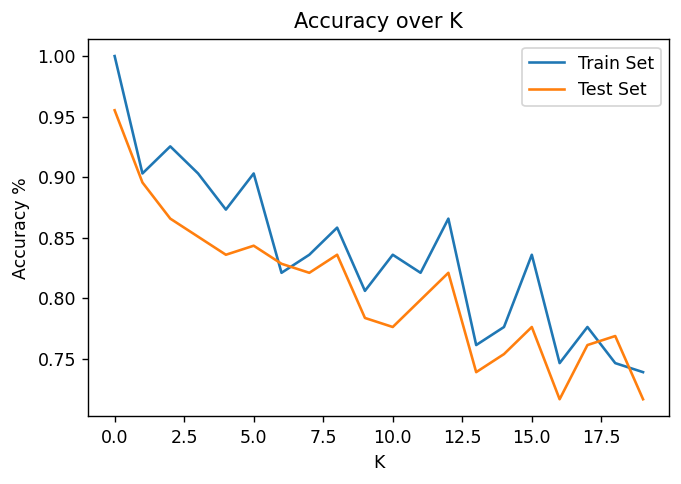

In [58]:
if __name__ == "__main__":

    #file is read from a class called SetUp 
    data = SetUp("wine.csv", {'Wine':'string','Alcohol':'float','Malic.acid':'float','Ash':'float','Acl':'float','Mg':'int','Phenols':'float','Flavanoids':'float','Nonflavanoid.phenols':'float','Proanth':'float','Color.int':'float','Hue':'float','OD':'float','Proline':'int'}) 
    
    knn = KNN(data.df)

    ####################### USER SETUP AREA #######################
    
    k = 20
    split = 0.25
    distance_formula = "cosine_distance"     
    #options "euclidean_distance", "chi_distance", "cosine_distance", "manhattan_distance"

    knn.print_res = True                       #if you want results printed change to True
    print_each_k_percentage = False             #if you want to print each k's percentage    
    
    ####################### END OF USER SETUP #######################

    k = np.arange(1, k+1)

    #empty lists to store each k's accuracy res           
    scoreTrain = []                
    scoreTest = []
    
    for i, num_k in enumerate(k):
        knn.correct = 0
        accTrain, accTest = knn.accuracy(split, num_k, distance_formula)   
        
        #storing each k's acc results
        scoreTrain.append(accTrain)
        scoreTest.append(accTest)
        
        if print_each_k_percentage:
            print("Performance at k = {}: ".format(num_k))     
            
            #accuracy of train
            print("Train: {:.3f}%".format(accTrain))       
            
            #accuracy of test
            print("Test: {:.3f}%".format(accTest))
            print()

    #overall performance accuracy
    trainp = sum(scoreTrain)/len(scoreTrain) 
    testp = sum(scoreTest)/len(scoreTest)

    print("==============================")
    print("Overall Performance: ")
    print("Train: {:.3f}%".format(trainp))
    print("Test: {:.3f}%".format(testp))
    print("Split: %f", split)
    print("==============================")
    knn.plot_accuracy(scoreTrain, scoreTest)